In [3]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data26276


In [4]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [5]:
!cp /home/aistudio/data/data26276/mnist-original.mat /home/aistudio/data/openml

数据集来自：http://yann.lecun.com/exdb/mnist/，本代码实现的是二分类问题，也就是检查图片中的数字是不是5，是为1，不是为0，实现多分类需要修改目标函数，同学们可以在aistudio的项目下面寻找用深度学习实现的手写数字识别。

In [1]:
import paddle


In [3]:
# 运行下面代码的时候，会在data文件夹下生成名为mldata的文件夹，如果你发现已经有了一个mldata文件，请删除它

In [2]:

from sklearn.datasets import fetch_openml
# 获取MNIST数据集
mnist = fetch_openml("mnist_784")
# mnist
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original',data_home='./data')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [6]:
x, y = mnist["data"], mnist["target"] # 将数据集拆分为数据 (特征) 和标签
x.shape # 查看特征的形状（70000张图像，每张图像有784个像素点（28x28））
y # 显示当前样本的标签（这里是第36002个图像）

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
import matplotlib
import matplotlib.pyplot as plt
 
digit_5 = x[36002] # 第36000个实例
digit_5_image = digit_5.reshape(28, 28) # 将一维数组的像素值重塑为二维28x28的矩阵以便显示图像
plt.imshow(digit_5_image, cmap = matplotlib.cm.binary,interpolation="nearest") # 绘制数字5的图像
plt.axis("on")
# save_fig("some_digit_plot")

(-0.5, 27.5, 27.5, -0.5)

In [8]:
import numpy as np

shuffle_index = np.random.permutation(70000) # permutation函数是用来打乱数据顺序的函数
x, y = x[shuffle_index], y[shuffle_index]
y = (y == '5')+ 0.0 # 将标签转化为二进制标签（如果标签为'5'则为1，否则为0）
x_train, x_test, y_train_5, y_test_5 = x[:60000], x[60000:], y[:60000], y[60000:]  # 将数据集分为训练集和测试集，使用60000张图像作为训练集，10000张图像作为测试集

In [9]:
# 利用SGDClassifier方法来进行训练
from sklearn.linear_model import SGDClassifier
 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5.ravel()) 
# x_train.shape = (60000, 784), y_train_5.ravel().shape = (60000, )
# 这里的reshape是一个重点，因为fit中的数据的形状为60000*784
# 而原本的some_digit的形状为一个list，所以我们要进行reshape操作使其变成一个(1, -1)的矩阵
result = sgd_clf.predict(x_test)
print(result)

[0. 1. 0. ... 0. 0. 0.]


In [10]:
from sklearn.model_selection import cross_val_score
# 进行3折交叉验证以评估模型的准确性
# 它会将训练集分为3部分，分别使用2部分进行训练，1部分进行测试，轮流进行
scores = cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

scores

array([0.96855, 0.9694 , 0.96925])

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)  # 进行交叉验证并生成训练集的预测结果
y_train_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)  # 计算混淆矩阵， 混淆矩阵显示了真实正例、真实负例、假正例和假负例的数量

array([[53922,   629],
       [ 1227,  4222]])

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 准确率 = TP / (TP + FP) （预测为正的样本中，真实为正的比例）



0.870336013193156

In [14]:
recall_score(y_train_5, y_train_pred) # 召回率 = TP / (TP + FN) （真实为正的样本中，被正确预测为正的比例）

0.7748210680858874

In [15]:
# 决策函数返回每个实例的原始分数
# 决策分数是通过SGDClassifier的decision_function方法计算的，它通过训练数据拟合出一个线性模型。这个模型可以表示为：f(x)=w⋅x+b，这个函数的值就是决策分数
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function") 

y_scores

array([-41948.20764594, -10488.57234189, -14151.0725356 , ...,
        -9744.98491427,  -3306.9737641 , -26513.87573069])

In [16]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

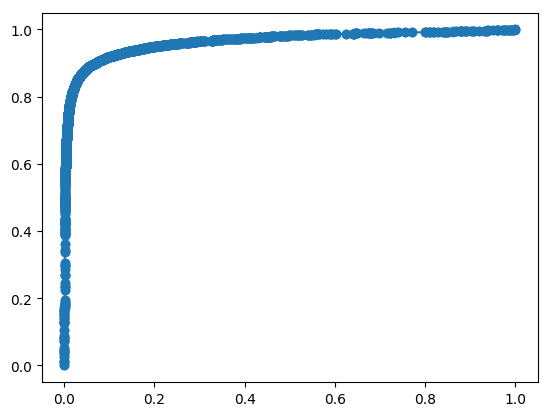

In [17]:
#计算多种阈值的TPR和FPR
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # fpr: 假正率, tpr: 真正率
plt.plot(fpr,tpr,marker = 'o')
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)